## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

#Confirm the Update

bitstamp.head()

C:\Users\nstaf\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:, "Close"].astype("float")

# Call the 'dtypes' function to review the update
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

# Drop all duplicated values
bitstamp = bitstamp.drop_duplicates()

# Review Update
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Use the dropna() function to drop all NaN values
coinbase.dropna()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [11]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$","")

coinbase.head()


C:\Users\nstaf\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame

# Convert the Close data type to a float
coinbase.loc[:,"Close"] = coinbase.loc[:, "Close"].astype("float")

# Call the 'dtypes' function to review the update
coinbase.dtypes



Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

# Drop all duplicated values
coinbase = coinbase.drop_duplicates()

# Review Update
coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [17]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

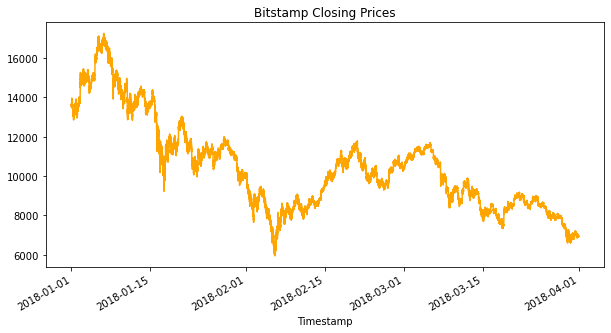

In [18]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(10,5),title = "Bitstamp Closing Prices", color= "orange")

<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

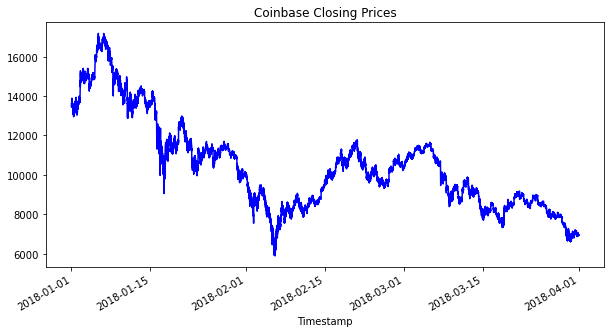

In [19]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(10,5), title = "Coinbase Closing Prices", color= "Blue")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

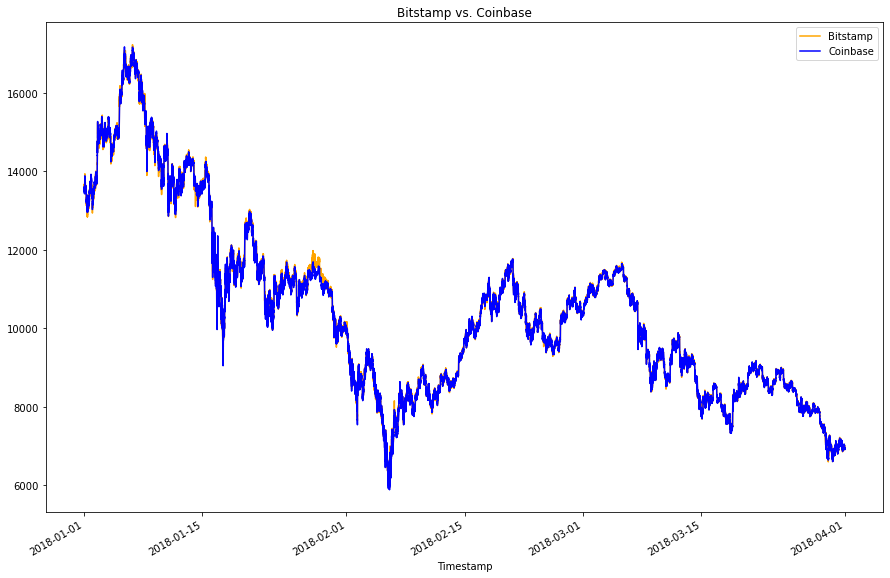

In [20]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15,10), title= "Bitstamp vs. Coinbase", color = "orange", label= "Bitstamp")
coinbase_sliced.plot(legend=True, figsize= (15,10), color = "blue", label = "Coinbase")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase January'}, xlabel='Timestamp'>

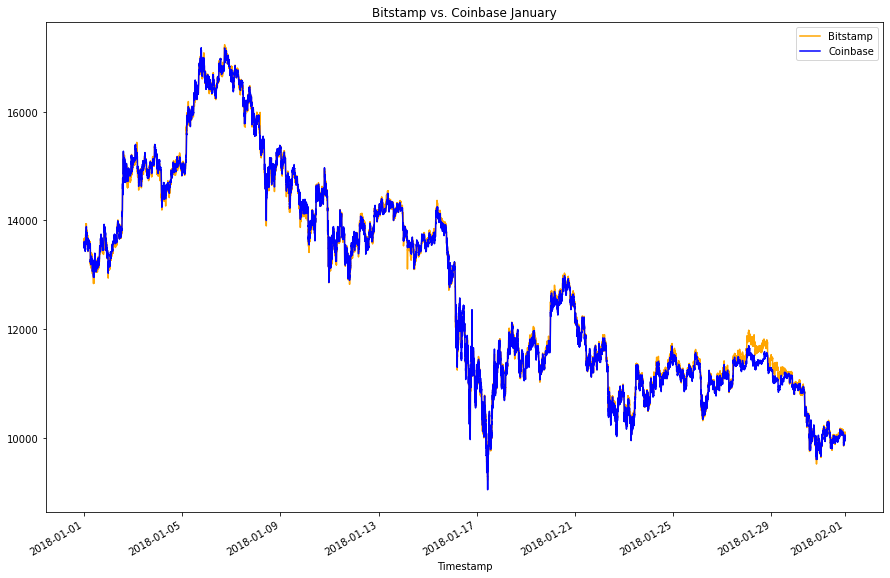

In [21]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-01': '2018-01-31'].plot(legend=True, figsize=(15,10), title= "Bitstamp vs. Coinbase January", color = "orange", label= "Bitstamp")
coinbase_sliced.loc['2018-01-01': '2018-01-31'].plot(legend=True, figsize= (15,10), color = "blue", label = "Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase March'}, xlabel='Timestamp'>

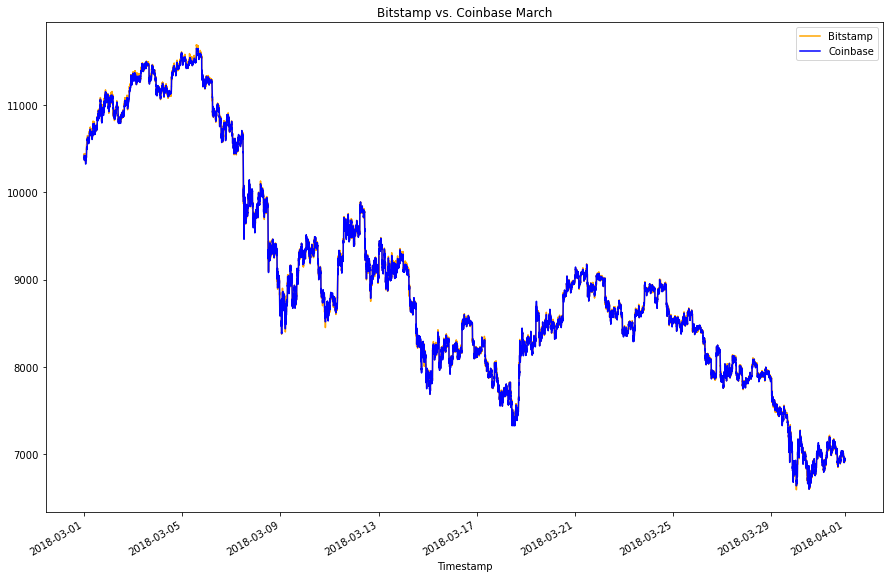

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01': '2018-03-31'].plot(legend=True, figsize=(15,10), title= "Bitstamp vs. Coinbase March", color = "orange", label= "Bitstamp")
coinbase_sliced.loc['2018-03-01': '2018-03-31'].plot(legend=True, figsize= (15,10), color = "blue", label = "Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** The degree of spread seems to be the highest during the middle time period, and seems to be the lowest in the late time period. Therefore, I don't see a linear trend in the spread degree with time progressing.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 29, 2018'}, xlabel='Timestamp'>

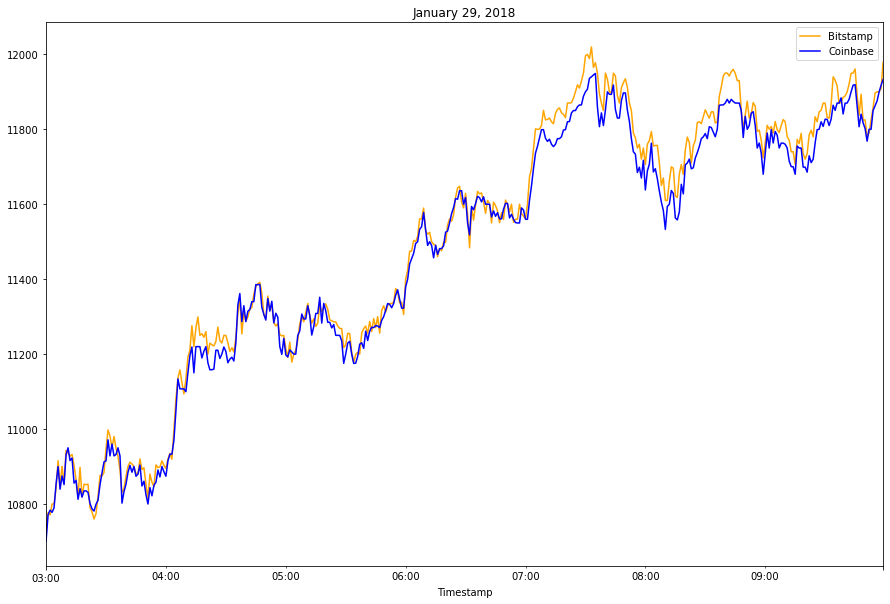

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_early = bitstamp_sliced.loc['2018-01-18 03': '2018-01-18 09']

bitstamp_early.plot(legend=True, figsize=(15,10), title= "January 29, 2018", color = "orange", label= "Bitstamp")

coinbase_early = coinbase_sliced.loc['2018-01-18 03': '2018-01-18 09']

coinbase_early.plot(legend=True, figsize= (15,10), color = "blue", label = "Coinbase")

In [24]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_early - bitstamp_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    420.000000
mean     -26.613857
std       28.615716
min     -101.040000
25%      -46.760000
50%      -24.625000
75%       -6.240000
max       38.380000
Name: Close, dtype: float64

<AxesSubplot:>

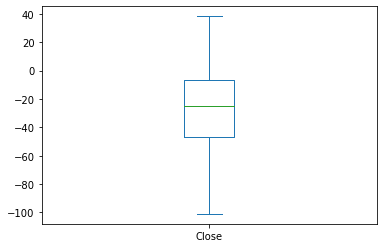

In [25]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'February 28, 2018'}, xlabel='Timestamp'>

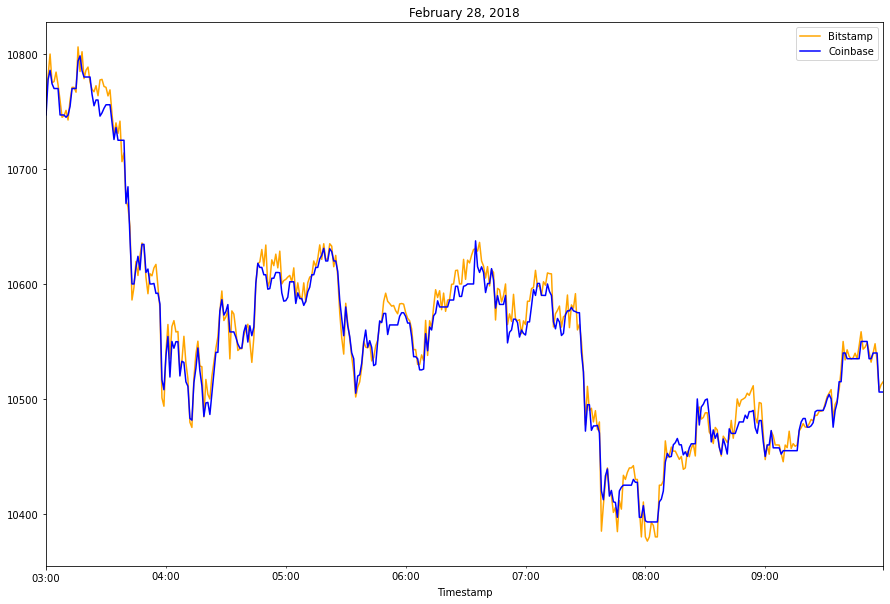

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_mid = bitstamp_sliced.loc['2018-02-28 03': '2018-02-28 09']

bitstamp_mid.plot(legend=True, figsize=(15,10), title= "February 28, 2018", color = "orange", label= "Bitstamp")

coinbase_mid = coinbase_sliced.loc['2018-02-28 03': '2018-02-28 09']

coinbase_mid.plot(legend=True, figsize= (15,10), color = "blue", label = "Coinbase")

In [27]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_mid - bitstamp_mid

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    419.000000
mean      -4.152792
std       10.220441
min      -31.440000
25%      -11.915000
50%       -4.500000
75%        2.445000
max       35.000000
Name: Close, dtype: float64

<AxesSubplot:>

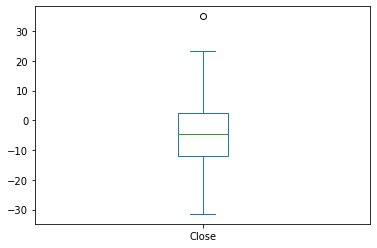

In [28]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'February 28, 2018'}, xlabel='Timestamp'>

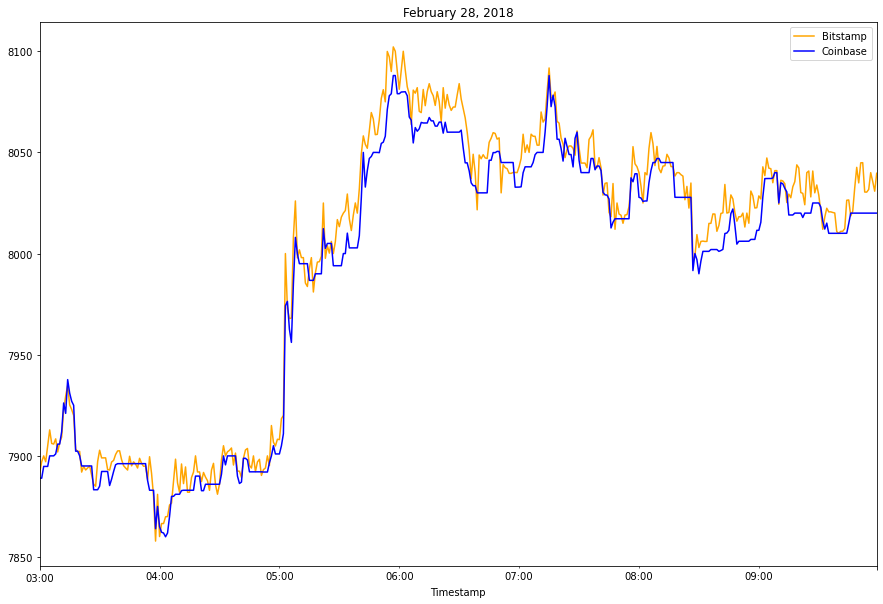

In [29]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_late = bitstamp_sliced.loc['2018-03-28 03': '2018-03-28 09']

bitstamp_late.plot(legend=True, figsize=(15,10), title= "February 28, 2018", color = "orange", label= "Bitstamp")

coinbase_late = coinbase_sliced.loc['2018-03-28 03': '2018-03-28 09']

coinbase_late.plot(legend=True, figsize= (15,10), color = "blue", label = "Coinbase")

In [30]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_late - bitstamp_late

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    420.000000
mean      -7.423643
std        7.906575
min      -28.730000
25%      -12.452500
50%       -6.775000
75%       -1.485000
max       15.000000
Name: Close, dtype: float64

<AxesSubplot:>

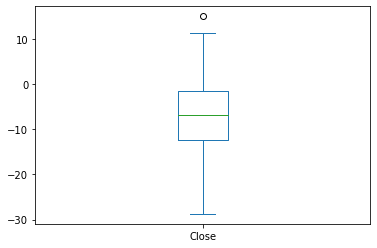

In [31]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [32]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_early - coinbase_early

arbitrage_spread_mid = bitstamp_mid - coinbase_mid

arbitrage_spread_late = bitstamp_late - coinbase_late

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
filter_early = arbitrage_spread_early > 0

positive_spread_early = arbitrage_spread_early.loc[filter_early]

positive_spread_early.describe()

count    347.000000
mean      35.177723
std       23.418766
min        0.010000
25%       16.640000
50%       30.290000
75%       51.420000
max      101.040000
Name: Close, dtype: float64

In [33]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
filter_mid = arbitrage_spread_mid > 0

positive_spread_mid = arbitrage_spread_mid.loc[filter_mid]

positive_spread_mid.describe()

count    280.000000
mean       9.719179
std        6.645429
min        0.010000
25%        4.472500
50%        8.620000
75%       14.195000
max       31.440000
Name: Close, dtype: float64

In [34]:
# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
filter_late = arbitrage_spread_late > 0

positive_spread_late = arbitrage_spread_late.loc[filter_late]

positive_spread_late.describe()

count    340.000000
mean       9.935471
std        6.502912
min        0.020000
25%        4.905000
50%        8.895000
75%       14.157500
max       28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [35]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early / coinbase_early

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-18 03:00:00    0.002249
2018-01-18 03:01:00    0.000517
2018-01-18 03:02:00   -0.001183
2018-01-18 03:03:00    0.002081
2018-01-18 03:04:00    0.000926
                         ...   
2018-01-18 09:55:00    0.002863
2018-01-18 09:56:00    0.002059
2018-01-18 09:57:00    0.000042
2018-01-18 09:58:00   -0.000691
2018-01-18 09:59:00    0.003846
Name: Close, Length: 420, dtype: float64

In [36]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_mid= arbitrage_spread_mid / coinbase_mid

# Review the spread return DataFrame
spread_return_mid

Timestamp
2018-02-28 03:00:00    0.001210
2018-02-28 03:01:00    0.000298
2018-02-28 03:02:00    0.001313
2018-02-28 03:03:00    0.000085
2018-02-28 03:04:00    0.000564
                         ...   
2018-02-28 09:55:00    0.000762
2018-02-28 09:56:00   -0.000645
2018-02-28 09:57:00    0.000155
2018-02-28 09:58:00    0.000605
2018-02-28 09:59:00    0.000843
Name: Close, Length: 420, dtype: float64

In [37]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late / coinbase_late

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-28 03:00:00    0.000347
2018-03-28 03:01:00    0.001031
2018-03-28 03:02:00    0.000660
2018-03-28 03:03:00    0.000294
2018-03-28 03:04:00    0.001300
                         ...   
2018-03-28 09:55:00    0.001458
2018-03-28 09:56:00    0.002495
2018-03-28 09:57:00    0.001954
2018-03-28 09:58:00    0.001350
2018-03-28 09:59:00    0.002455
Name: Close, Length: 420, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [38]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.1]

# Review the first five profitable trades
profitable_trades_early.head()

Series([], Name: Close, dtype: float64)

In [39]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_mid = spread_return_mid[spread_return_mid > 0.1]

# Review the first five profitable trades
profitable_trades_mid.head()

Series([], Name: Close, dtype: float64)

In [40]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.1]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [41]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [42]:
# For the date in the middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_mid.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [43]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [44]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = positive_spread_early * coinbase_early

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-18 03:00:00    257573.3107
2018-01-18 03:01:00     59996.8651
2018-01-18 03:03:00    241740.8951
2018-01-18 03:04:00    107792.1999
2018-01-18 03:06:00    170149.0000
Name: Close, dtype: float64

In [45]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_mid = positive_spread_mid * coinbase_mid

# Drop any missing values from the profit DataFrame
profit_per_trade_mid = profit_mid.dropna()

# View the middle profit DataFrame
profit_per_trade_mid.head()

Timestamp
2018-02-28 03:00:00    139711.7800
2018-02-28 03:01:00     34596.7059
2018-02-28 03:02:00    152727.3528
2018-02-28 03:03:00      9912.1536
2018-02-28 03:04:00     65373.9000
Name: Close, dtype: float64

In [46]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = positive_spread_late * coinbase_late

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-03-28 03:00:00    21615.7778
2018-03-28 03:01:00    64137.3261
2018-03-28 03:02:00    41131.8038
2018-03-28 03:03:00    18315.8896
2018-03-28 03:04:00    81000.4428
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [47]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    3.470000e+02
mean     4.074778e+05
std      2.757941e+05
min      1.090000e+02
25%      1.866489e+05
50%      3.501398e+05
75%      5.911890e+05
max      1.173249e+06
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

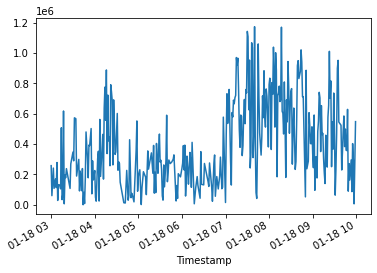

In [48]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

In [49]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_mid.describe()

count       280.000000
mean     102712.897771
std       70344.908986
min         104.755000
25%       46879.659025
50%       90852.542950
75%      151239.976800
max      337854.240000
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

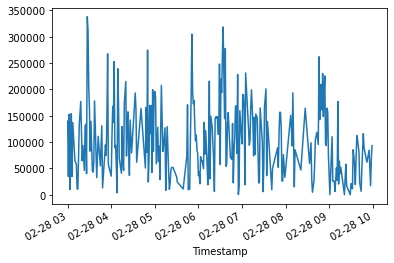

In [50]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_mid.plot()

In [51]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_late.describe()

count       340.000000
mean      79572.388645
std       52251.959837
min         157.719400
25%       39262.807050
50%       71156.606150
75%      114191.145000
max      231884.714100
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

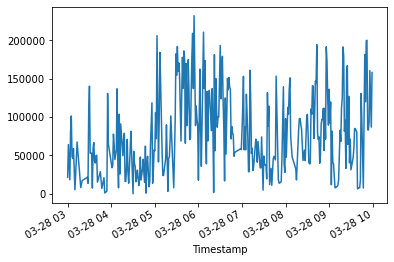

In [52]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

141394786.96539986

In [54]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_mid.sum()

28759611.375899818

In [55]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()

27054612.139399983

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [56]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

In [57]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_mid = profit_per_trade_mid.cumsum()

In [58]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:xlabel='Timestamp'>

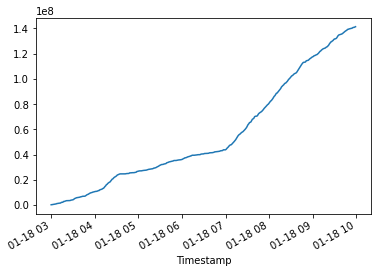

In [59]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot()

<AxesSubplot:xlabel='Timestamp'>

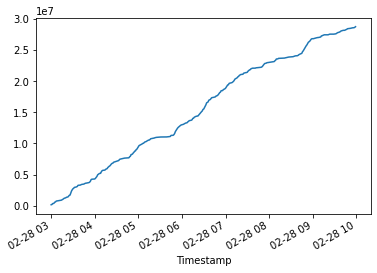

In [60]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_mid.plot()

<AxesSubplot:xlabel='Timestamp'>

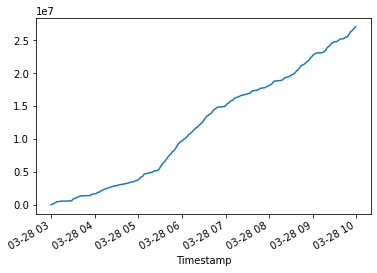

In [61]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot()

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** On the dates I chose, there were a lot of arbitrage opportunities on the mid and late dates. 